In [3]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
league = '313'

In [16]:
df = pd.read_csv(f"./database/{league}/GuildStashHistory.csv")

In [17]:
df = df.drop(["League"], axis=1)
df

,Date,Account,Action,Stash,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,$,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,$,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,$,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,$,221× Orb of Scouring
...,...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,$,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,$,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,$,Orb of Transmutation


In [18]:
df = df[df["Stash"] == "$"].drop(["Stash"], axis=1)
df

,Date,Account,Action,Item
0,22/12/2023 16:29:00,ThrarThylnenfallën,modified,717× Orb of Alchemy
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
...,...,...,...,...
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation


In [19]:
df = df.reindex(index=df.index[::-1])
df

,Date,Account,Action,Item
27661,08/12/2023 20:16:41,ErZil,added,9× Transmutation Shard
27660,08/12/2023 20:16:43,ErZil,added,Orb of Transmutation
27659,08/12/2023 20:33:19,ErZil,added,level 1 0% Fireball
27658,08/12/2023 20:33:19,ErZil,added,Orb of Augmentation
27657,08/12/2023 20:33:19,ErZil,added,2× Blacksmith's Whetstone
...,...,...,...,...
4,22/12/2023 16:28:41,ThrarThylnenfallën,modified,221× Orb of Scouring
3,22/12/2023 16:28:57,ThrarThylnenfallën,modified,737× Orb of Alchemy
2,22/12/2023 16:28:57,ThrarThylnenfallën,modified,248× Orb of Scouring
1,22/12/2023 16:28:59,ThrarThylnenfallën,modified,218× Orb of Scouring


In [20]:
def strItemRead(itemStr):
    if itemStr[0].isdigit():
        ndigits = 0
        for i in itemStr:
            if i.isdigit():
                ndigits += 1
        nbItem = int(itemStr[0:ndigits])
        item = itemStr[ndigits+2:]
    else:
        item = itemStr
        nbItem = 1
    return nbItem, item

print(strItemRead("1x Divine Orb"))
print(strItemRead("level 1 0% Fireball"))

(1, 'Divine Orb')
(1, 'level 1 0% Fireball')


In [21]:
Stash = []
Diff = []

# Hypothesis : The file is the evolution of the stash from the start of the league (empty stash before the first action)
for index, row in df.iterrows():
    previous_state = Stash[-1] if len(Stash) > 0 else None
    updated_state = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    if previous_state is None:
        stash_state = updated_state
    else:
        stash_state = {**previous_state, **updated_state}

    stash_diff = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    nbItem, item = strItemRead(row["Item"])

    if row["Action"] == "added":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem

    elif row["Action"] == "removed":
        stash_state[item] -= nbItem
        stash_diff[item] = -nbItem

    elif row["Action"] == "modified":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem - Stash[-1][item]
        
    Stash.append(stash_state)
    Diff.append(stash_diff)

df_Stash = pd.DataFrame(Stash)
df_Diff = pd.DataFrame(Diff)

In [22]:
import matplotlib.dates as mdates

In [23]:
df_Stash["Datetime"] = pd.to_datetime(df_Stash["Datetime"], format="%d/%m/%Y %H:%M:%S")

In [24]:
df_Stash["Datetime"][1000]

Timestamp('2023-12-09 22:03:54')

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/1420322020.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/1420322020.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')


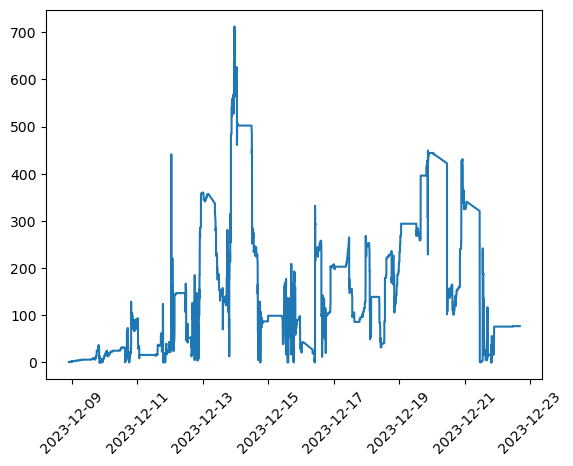

In [28]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/3781875257.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, df_Stash["Scroll of Wisdom"], marker='None')
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/3781875257.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, df_Stash["Scroll of Wisdom"], marker='None')


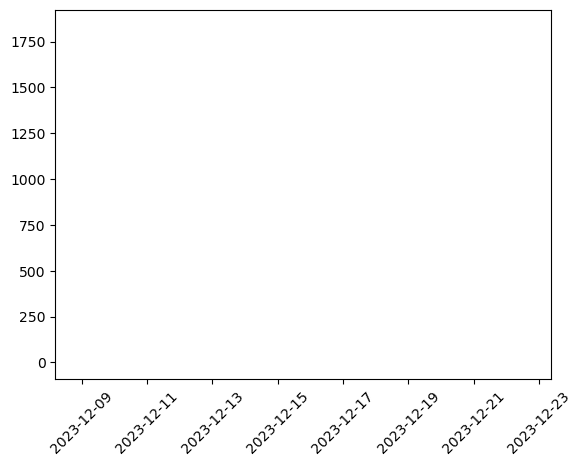

In [30]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Scroll of Wisdom"], marker='None')

In [74]:
#hand written data of Divine Orb/Chaos Orb ratio from poe.ninja

Div_History = [40, 87, 103, 133, 138, 145, 155, 168, 172, 172, 172, 175, 178, 185, 195, 200, 211, 213, 215, 215, 215, 215, 215, 215, 215, 215, 215]
Date_Div = [datetime.date(2023, 12, 8), 
            datetime.date(2023, 12, 9),
            datetime.date(2023, 12, 10),
            datetime.date(2023, 12, 11),
            datetime.date(2023, 12, 12),
            datetime.date(2023, 12, 13),
            datetime.date(2023, 12, 14),
            datetime.date(2023, 12, 15),
            datetime.date(2023, 12, 16),
            datetime.date(2023, 12, 17),
            datetime.date(2023, 12, 18),
            datetime.date(2023, 12, 19),
            datetime.date(2023, 12, 20),
            datetime.date(2023, 12, 21),
            datetime.date(2023, 12, 22),
            datetime.date(2023, 12, 23),
            datetime.date(2023, 12, 24),
            datetime.date(2023, 12, 25),
            datetime.date(2023, 12, 26),
            datetime.date(2023, 12, 27),
            datetime.date(2023, 12, 28),
            datetime.date(2023, 12, 29),
            datetime.date(2023, 12, 30),
            datetime.date(2023, 12, 31),
            datetime.date(2024, 1, 1),
            datetime.date(2024, 1, 2),
            datetime.date(2024, 1, 3)
            ]


def getDivineRatio(date):
    for i in range(len(Date_Div)):
        if date <= Date_Div[i]:
            return Div_History[i]
    return Div_History[-1]

df_Stash["Date"] = pd.to_datetime(df_Stash["Datetime"], format = "%d/%m/%Y %H:%M:%S").dt.date

In [77]:
getDivineRatio(df_Stash["Date"][1000])

87

In [78]:
CurrencySeries = df_Stash["Chaos Orb"]/df_Stash["Date"].apply(getDivineRatio) + df_Stash["Divine Orb"]

In [79]:
CurrencySeries.fillna(0, inplace=True)

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/1652931722.py:3: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/1652931722.py:3: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')


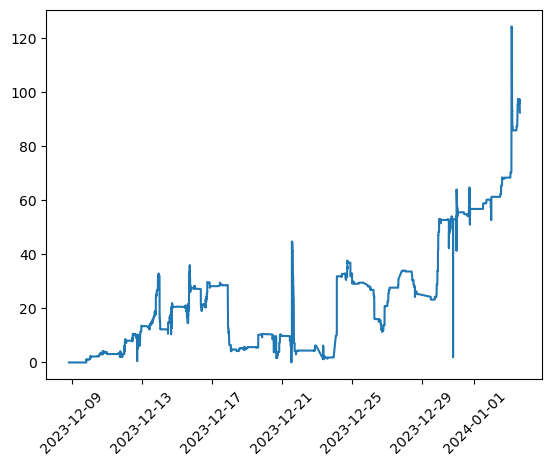

In [80]:
dates = mdates.date2num(df_Stash["Datetime"])
plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')

In [81]:
df_Diff["Date"] = pd.to_datetime(df_Diff["Datetime"], format = "%d/%m/%Y %H:%M:%S").dt.date
df_DiffLuac = df_Diff[df_Diff["Account"] == "ErZil"].fillna(0)

In [82]:
df_DiffLuac

,Datetime,Account,Transmutation Shard,Orb of Transmutation,level 1 0% Fireball,Orb of Augmentation,Blacksmith's Whetstone,Scroll Fragment,Alchemy Shard,Alteration Shard,...,Bramblejack Plate Vest,Warlord's Exalted Orb,Elevated Sextant,Charged Compass,Screaming Essence of Dread,Watcher's Eye Prismatic Jewel,Tainted Mythic Orb,Omen of the Jeweller,Omen of the Soul Devourer,Date
0,2023-12-08 20:16:41,ErZil,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
1,2023-12-08 20:16:43,ErZil,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
2,2023-12-08 20:33:19,ErZil,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
3,2023-12-08 20:33:19,ErZil,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
4,2023-12-08 20:33:19,ErZil,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,2024-01-03 14:11:38,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03
25243,2024-01-03 14:12:03,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03
25244,2024-01-03 14:13:12,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03
25245,2024-01-03 14:13:13,ErZil,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03


In [83]:
df_SummedLuac = df_DiffLuac.drop(["Datetime", "Account", "Date"], axis=1)
df_SummedLuac.reset_index(drop=True, inplace=True)

for index, row in df_SummedLuac.iterrows():
    if index != 0:
        df_SummedLuac.iloc[index] = df_SummedLuac.iloc[index-1] + df_SummedLuac.iloc[index]

In [84]:
SeriesDates = df_DiffLuac["Date"]
SeriesDates.reset_index(drop=True, inplace=True)

In [85]:
SeriesDates

0       2023-12-08
1       2023-12-08
2       2023-12-08
3       2023-12-08
4       2023-12-08
           ...    
7034    2024-01-03
7035    2024-01-03
7036    2024-01-03
7037    2024-01-03
7038    2024-01-03
Name: Date, Length: 7039, dtype: object

In [86]:
df_SummedLuac["Date"] = SeriesDates

In [87]:
df_SummedLuac

,Transmutation Shard,Orb of Transmutation,level 1 0% Fireball,Orb of Augmentation,Blacksmith's Whetstone,Scroll Fragment,Alchemy Shard,Alteration Shard,Orb of Alteration,Orb of Alchemy,...,Bramblejack Plate Vest,Warlord's Exalted Orb,Elevated Sextant,Charged Compass,Screaming Essence of Dread,Watcher's Eye Prismatic Jewel,Tainted Mythic Orb,Omen of the Jeweller,Omen of the Soul Devourer,Date
0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
1,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
2,9.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
3,9.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
4,9.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7034,14.0,4960.0,0.0,232.0,641.0,-1.0,-8.0,97.0,2362.0,616.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03
7035,14.0,4960.0,0.0,232.0,641.0,-1.0,-8.0,108.0,2362.0,616.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03
7036,14.0,4960.0,0.0,232.0,641.0,-1.0,-8.0,108.0,2362.0,616.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03
7037,14.0,4960.0,0.0,232.0,641.0,-1.0,-8.0,108.0,2362.0,616.0,...,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-01-03


In [88]:
CurrencySeriesLuac = df_SummedLuac["Chaos Orb"] / df_SummedLuac["Date"].apply(getDivineRatio) + df_SummedLuac["Divine Orb"]

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/2054087124.py:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeriesLuac, linestyle='solid', marker='None')
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/2054087124.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeriesLuac, linestyle='solid', marker='None')


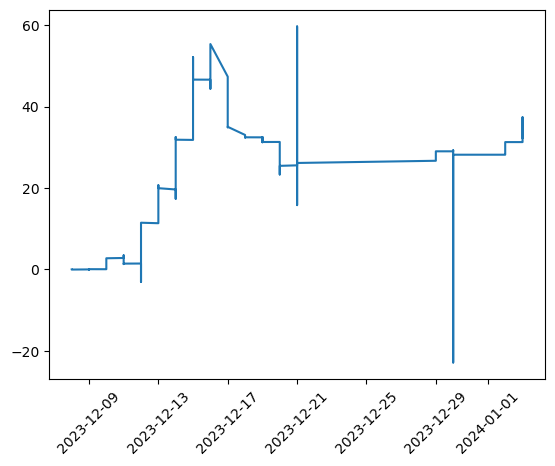

In [89]:
dates = mdates.date2num(df_DiffLuac["Date"])

plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeriesLuac, linestyle='solid', marker='None')

In [90]:
# Function to plot the evolution of a players contribution to the guild stash's currencies (div and chaos)

def plotPlayerContribution(playerName):
    df_DiffPlayer = df_Diff[df_Diff["Account"] == playerName].fillna(0)
    df_SummedPlayer = df_DiffPlayer.drop(["Datetime", "Account", "Date"], axis=1)
    df_SummedPlayer.reset_index(drop=True, inplace=True)

    for index, row in df_SummedPlayer.iterrows():
        if index != 0:
            df_SummedPlayer.iloc[index] = df_SummedPlayer.iloc[index-1] + df_SummedPlayer.iloc[index]

    SeriesDates = df_DiffPlayer["Date"]
    SeriesDates.reset_index(drop=True, inplace=True)

    df_SummedPlayer["Date"] = SeriesDates

    CurrencySeriesPlayer = df_SummedPlayer["Chaos Orb"] / df_SummedPlayer["Date"].apply(getDivineRatio) + df_SummedPlayer["Divine Orb"] 

    dates = mdates.date2num(df_DiffPlayer["Date"])
    
    plt.xticks(rotation=45)
    plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
    plt.legend()

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)


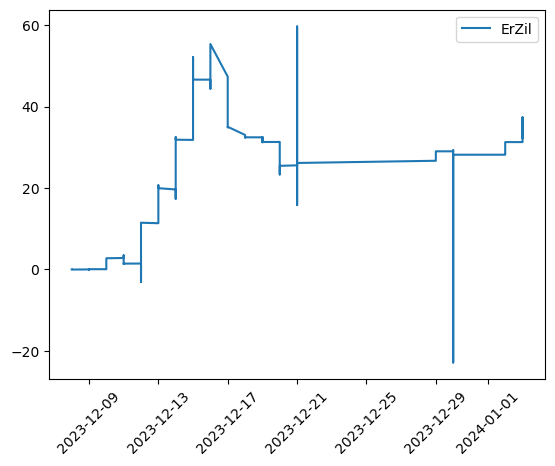

In [91]:
plotPlayerContribution("ErZil")

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)


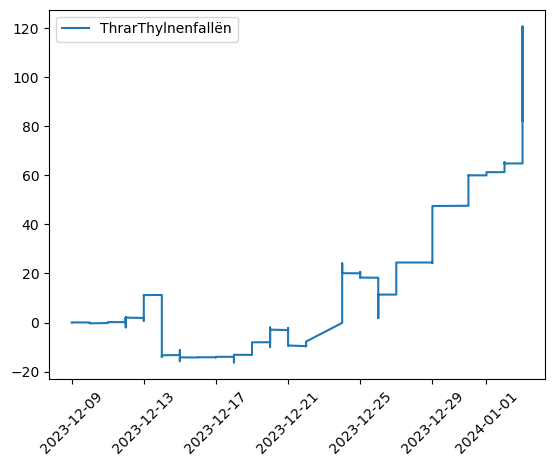

In [92]:
plotPlayerContribution("ThrarThylnenfallën")

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)


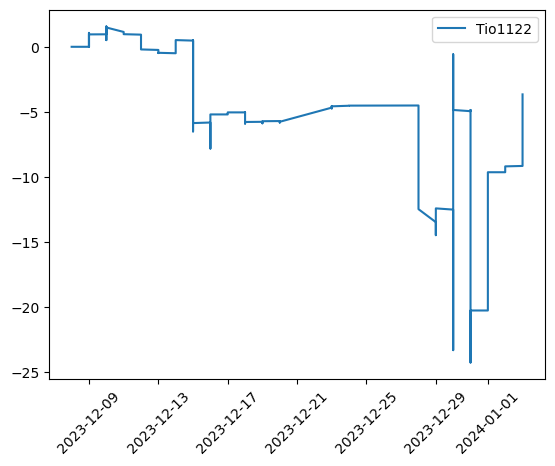

In [93]:
plotPlayerContribution("Tio1122")

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)


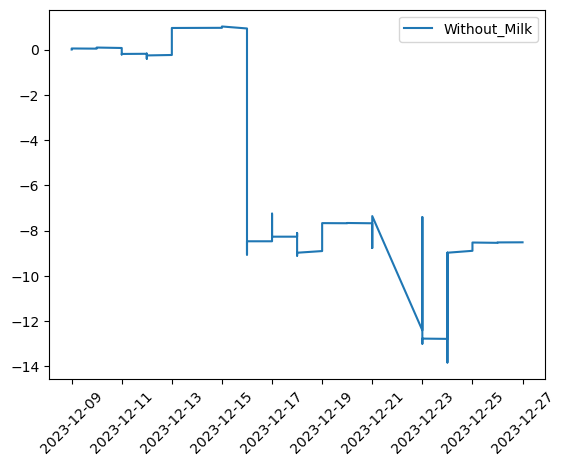

In [94]:
plotPlayerContribution("Without_Milk")

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/962528404.py:22: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, CurrencySeriesPlayer, linestyle='solid', marker='None', label = playerName)


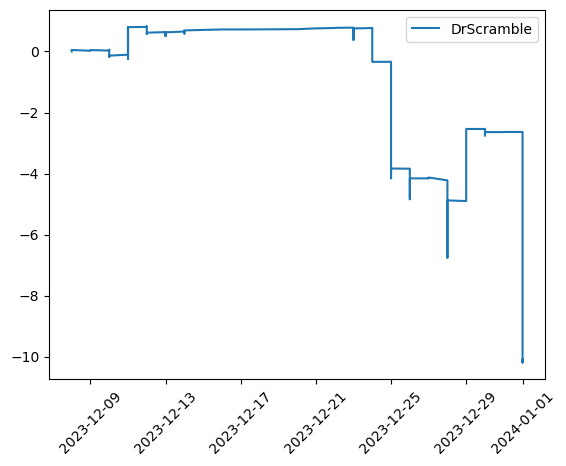

In [95]:
plotPlayerContribution("DrScramble")

In [96]:
def avg_onperiod(df, tdelta):
    # Takes in argument a Dataframe with a "Datetime" column and calculate the weighted average over such a period
    # tdelta is a datetime.timedelta object
    # Returns a new Dataframe with averaged values and a "Datetime" column

    Bondaries = [df["Datetime"][0]]
    window_right_bondary = df["Datetime"][0] + tdelta
    Bondaries.append(window_right_bondary)

    # Plateau is a list of tuples (plateau value, plateau length)
    Plateau = []

    for index, row in df.iterrows():

        if index != 0 and row["Datetime"] < window_right_bondary:

            present_datetime = row["Datetime"]
            previous_datetime = df["Datetime"][index-1]

            plateau_tdelta = present_datetime - previous_datetime
            plateau_value = (df["Chaos Orb"][index-1] + df["Chaos Orb"][index])/2

            Plateau.append((plateau_value, plateau_tdelta))

        elif index != 0 and row["Datetime"] >= window_right_bondary:
            #TODO: fix this part

            present_datetime = row["Datetime"]
            previous_datetime = df["Datetime"][index-1]

            plateau_tdelta = window_right_bondary - previous_datetime
            plateau_value = (df["Chaos Orb"][index-1] + df["Chaos Orb"][index])/2

            Plateau.append((plateau_value, plateau_tdelta))

            Bondaries.append(window_right_bondary)
            window_right_bondary += tdelta

    
    

In [97]:
# Updated datas

dfpart1 = pd.read_csv(f"./database/{league}/GuildStashHistory.csv")
dfpart2 = pd.read_csv(f"./database/{league}/GuildStashHistory2.csv")

dfpart1["Date"] = pd.to_datetime(dfpart1["Date"], format="%d/%m/%Y %H:%M:%S")
dfpart2["Date"] = pd.to_datetime(dfpart2["Date"], format="%d/%m/%Y %H:%M:%S")

In [98]:
dfpart1[dfpart1["Date"] < pd.Timestamp(2023, 12, 22)]

,Date,League,Account,Action,Stash,Item
104,2023-12-21 22:08:09,Affliction,Without_Milk,modified,D,16× Hunter's Resolve
105,2023-12-21 22:08:09,Affliction,Without_Milk,modified,D,27× The Stormcaller
106,2023-12-21 22:08:09,Affliction,Without_Milk,modified,D,6× Lucky Connections
107,2023-12-21 22:08:08,Affliction,Without_Milk,modified,D,20× The Cache
108,2023-12-21 22:08:07,Affliction,Without_Milk,modified,D,32× The Gemcutter
...,...,...,...,...,...,...
27657,2023-12-08 20:33:19,Affliction,ErZil,added,$,2× Blacksmith's Whetstone
27658,2023-12-08 20:33:19,Affliction,ErZil,added,$,Orb of Augmentation
27659,2023-12-08 20:33:19,Affliction,ErZil,added,$,level 1 0% Fireball
27660,2023-12-08 20:16:43,Affliction,ErZil,added,$,Orb of Transmutation


In [99]:
dffused = pd.concat([dfpart2, dfpart1[dfpart1["Date"] < pd.Timestamp(2023, 12, 22)]])

In [100]:
dffused = dffused.reset_index(drop=True)

In [101]:
dffused

,Date,League,Account,Action,Stash,Item
0,2024-01-03 14:13:15,Affliction,ErZil,modified,$,22× Vaal Scouting Report
1,2024-01-03 14:13:13,Affliction,ErZil,removed,$,6× Singular Scouting Report
2,2024-01-03 14:13:12,Affliction,ErZil,modified,$,2× Vaal Scouting Report
3,2024-01-03 14:12:03,Affliction,ErZil,modified,$,13× Alteration Shard
4,2024-01-03 14:11:38,Affliction,ErZil,modified,$,3× Orb of Conflict
...,...,...,...,...,...,...
44507,2023-12-08 20:33:19,Affliction,ErZil,added,$,2× Blacksmith's Whetstone
44508,2023-12-08 20:33:19,Affliction,ErZil,added,$,Orb of Augmentation
44509,2023-12-08 20:33:19,Affliction,ErZil,added,$,level 1 0% Fireball
44510,2023-12-08 20:16:43,Affliction,ErZil,added,$,Orb of Transmutation


In [102]:
dffused.to_csv("./database/Guildstash")

In [103]:
dffused = dffused.drop(["League"], axis=1)
dffused

,Date,Account,Action,Stash,Item
0,2024-01-03 14:13:15,ErZil,modified,$,22× Vaal Scouting Report
1,2024-01-03 14:13:13,ErZil,removed,$,6× Singular Scouting Report
2,2024-01-03 14:13:12,ErZil,modified,$,2× Vaal Scouting Report
3,2024-01-03 14:12:03,ErZil,modified,$,13× Alteration Shard
4,2024-01-03 14:11:38,ErZil,modified,$,3× Orb of Conflict
...,...,...,...,...,...
44507,2023-12-08 20:33:19,ErZil,added,$,2× Blacksmith's Whetstone
44508,2023-12-08 20:33:19,ErZil,added,$,Orb of Augmentation
44509,2023-12-08 20:33:19,ErZil,added,$,level 1 0% Fireball
44510,2023-12-08 20:16:43,ErZil,added,$,Orb of Transmutation


In [104]:
dffused = dffused[dffused["Stash"] == "$"].drop(["Stash"], axis=1)
dffused

,Date,Account,Action,Item
0,2024-01-03 14:13:15,ErZil,modified,22× Vaal Scouting Report
1,2024-01-03 14:13:13,ErZil,removed,6× Singular Scouting Report
2,2024-01-03 14:13:12,ErZil,modified,2× Vaal Scouting Report
3,2024-01-03 14:12:03,ErZil,modified,13× Alteration Shard
4,2024-01-03 14:11:38,ErZil,modified,3× Orb of Conflict
...,...,...,...,...
44507,2023-12-08 20:33:19,ErZil,added,2× Blacksmith's Whetstone
44508,2023-12-08 20:33:19,ErZil,added,Orb of Augmentation
44509,2023-12-08 20:33:19,ErZil,added,level 1 0% Fireball
44510,2023-12-08 20:16:43,ErZil,added,Orb of Transmutation


In [105]:
dffused = dffused.reindex(index=dffused.index[::-1])
dffused

,Date,Account,Action,Item
44511,2023-12-08 20:16:41,ErZil,added,9× Transmutation Shard
44510,2023-12-08 20:16:43,ErZil,added,Orb of Transmutation
44509,2023-12-08 20:33:19,ErZil,added,level 1 0% Fireball
44508,2023-12-08 20:33:19,ErZil,added,Orb of Augmentation
44507,2023-12-08 20:33:19,ErZil,added,2× Blacksmith's Whetstone
...,...,...,...,...
4,2024-01-03 14:11:38,ErZil,modified,3× Orb of Conflict
3,2024-01-03 14:12:03,ErZil,modified,13× Alteration Shard
2,2024-01-03 14:13:12,ErZil,modified,2× Vaal Scouting Report
1,2024-01-03 14:13:13,ErZil,removed,6× Singular Scouting Report


In [106]:
Stash = []
Diff = []

for index, row in dffused.iterrows():
    previous_state = Stash[-1] if len(Stash) > 0 else None
    updated_state = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    if previous_state is None:
        stash_state = updated_state
    else:
        stash_state = {**previous_state, **updated_state}

    stash_diff = {
        "Datetime" : row["Date"],
        "Account" : row["Account"]
    }

    nbItem, item = strItemRead(row["Item"])

    if row["Action"] == "added":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem

    elif row["Action"] == "removed":
        stash_state[item] -= nbItem
        stash_diff[item] = -nbItem

    elif row["Action"] == "modified":
        stash_state[item] = nbItem
        stash_diff[item] = nbItem - Stash[-1][item]
        
    Stash.append(stash_state)
    Diff.append(stash_diff)

df_Stash = pd.DataFrame(Stash)
df_Diff = pd.DataFrame(Diff)

In [107]:
df_Diff["Date"] = df_Diff["Datetime"]
df_Stash["Date"] = df_Stash["Datetime"]

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/297335339.py:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/297335339.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')


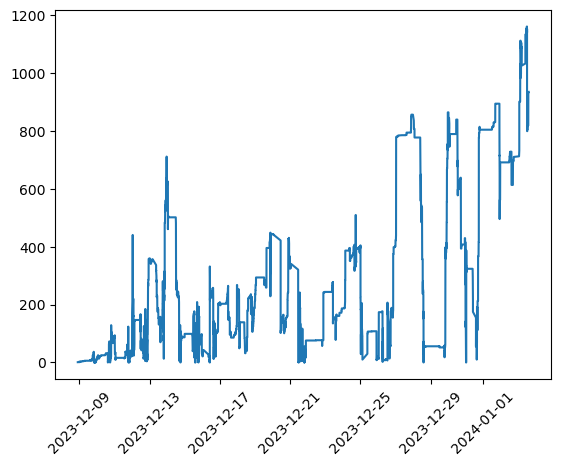

In [108]:
dates = mdates.date2num(df_Stash["Datetime"])

plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Chaos Orb"], linestyle='solid', marker='None')

/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/1579805691.py:4: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')
/var/folders/3r/rjt110g17yz3jg7hyqpnx7wh0000gn/T/ipykernel_43523/1579805691.py:4: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')


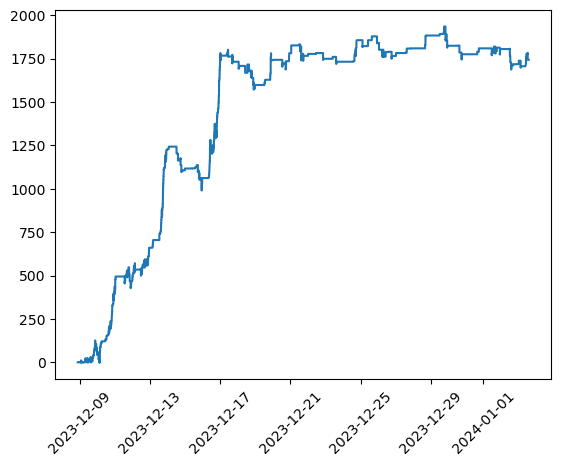

In [109]:
dates = mdates.date2num(df_Stash["Datetime"])

plt.xticks(rotation=45)
plt.plot_date(dates, df_Stash["Scroll of Wisdom"], linestyle='solid', marker='None')

In [110]:
CurrencySeries = df_Stash["Chaos Orb"]/df_Stash["Datetime"].apply(getDivineRatio) + df_Stash["Divine Orb"]

TypeError: Cannot compare Timestamp with datetime.date. Use ts == pd.Timestamp(date) or ts.date() == date instead.

In [142]:
CurrencySeries.fillna(0, inplace=True)

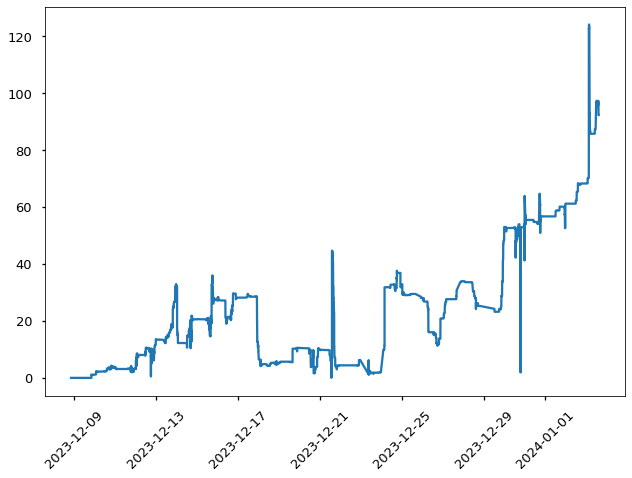

In [143]:
dates = mdates.date2num(df_Stash["Datetime"])

plt.xticks(rotation=45)
plt.plot_date(dates, CurrencySeries, linestyle='solid', marker='None')

In [70]:
plotPlayerContribution("ErZil")
plotPlayerContribution("ThrarThylnenfallën")
plotPlayerContribution("Tio1122")
plotPlayerContribution("Without_Milk")
plotPlayerContribution("DrScramble")

TypeError: Cannot compare Timestamp with datetime.date. Use ts == pd.Timestamp(date) or ts.date() == date instead.